In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Embedding,LSTM,concatenate
from tensorflow.keras import Input

seq_model = Sequential()
seq_model.add(Dense(32, activation='relu',input_shape=(64,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))

seq_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 함수형 API
input_tensor = Input(shape=(64,))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(input_tensor,output_tensor)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


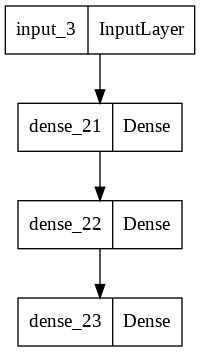

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
#MNIST 이미지 데이터 로드하고 벡터로 재구성
#데이터에 모델을 맞추고
#테스트 데이터에서 모델 평가

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
inputs=keras.Input(shape=(784,),name='digits')
x=Dense(64,activation='relu',name='dense_1')(inputs)
x=Dense(64,activation='relu',name='dense_2')(x)
outputs = Dense(10,activation='softmax',name='predictions')(x)

model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 predictions (Dense)         (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train=x_train.reshape(60000,784).astype('float32')/255
x_test=x_test.reshape(10000,784).astype('float32')/255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val=x_train[-10000:]
y_val=y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

CategoricalCrossentropy vs SparseCategoricalCrossentropy
- 훈련 데이터의 label(target)이 one-hot vector 이면 CategoricalCrossentropy
- 훈련 데이터의 label(target)이 정수이면 SparseCategoricalCrossentropy


In [ ]:
# 훈련 구성
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_val,y_val)
)

Epoch 1/2
782/782 [==============================] - 6s 4ms/step - loss: 0.3433 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.1858 - val_sparse_categorical_accuracy: 0.9456
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.1569 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.1333 - val_sparse_categorical_accuracy: 0.9616


In [ ]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9601


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

# 텍스트 입력은 길이가 정해지지 않은 정수 시퀀스
text_input = Input(shape = (None, ), dtype = 'int32', name = 'text')

# 크기 64의 벡터 시퀀스로 임베딩
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)

# LSTM을 사용하여 이 벡터들을 하나의 벡터로 인코딩
encoded_text = layers.LSTM(32)(embedded_text)

# 질문도 텍스트와 동일한 과정을 거친다
question_input = Input(shape = (None, ), dtype = 'int32', name = 'question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

# 인코딩된 질문과 텍스트를 연결
# axis = -1은 가장 낮은 차원에서부터 시작. 자료가 2차원이고 axis = -1이면 1차원에서 붙이라는 의미이다.
concatenated = layers.concatenate([encoded_text, encoded_question], axis = -1)

answer = layers.Dense(answer_vocabulary_size, activation = 'softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
[과제] 입력이 2개인 모델에 대하여 훈련을 수행하세요.
- num_samples = 1000, max_length = 100

In [ ]:
num_samples = 1000
max_length = 100

# 입력으로 사용할 Data를 Random하게 Shpae를 맞춰서 선언한다.
text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

# Target Data를 원핫 인코딩을 통하여 구성한다.
answers = np.random.randint(0, answer_vocabulary_size, size=num_samples)
answers = to_categorical(answers)


model.fit([text, question], answers, epochs=10, batch_size=128)


In [ ]:
다중모델 출력
소설미디어에서 익명 사용자의 포스트를 입력으로 받아 그 사람의 나이,성별,소득수준을 예측

In [ ]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Dense

vocabulary_size = 50000
num_income_groups = 10

post_input = Input(shape=(None,), dtype='int32', name='posts') # input: 소셜 미디어 사용자 포스트
embedded_posts = Embedding(vocabulary_size, 256)(post_input)

x = Conv1D(128, 5, activation='relu')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1, name='age')(x) # output_1: 나이 예측
income_prediction = Dense(num_income_groups, activation='softmax', name='income')(x) # output_2: 수입 예측
gender_prediction = Dense(1, activation='sigmoid', name='gender')(x) # output_3: 성별 예측

model = Model(post_input, [age_prediction, income_prediction, gender_prediction])
model = compile(optimizer='rmsprop', 
                loss=['mse','categorical_crossentropy','binary_crossentropy'])

TypeError: ignored

In [ ]:
model.fit(posts,)